# ***Handwritten Digit Classification Model***

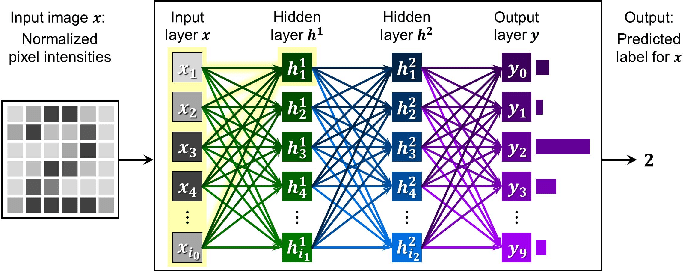

# ***Data Preprocessing***

In this process, we perform following steps
* load data from keras datasets
* divide the dataset into X_train , Y_train,X_test and Y_test
* Flatten the Features
* Encoded the Targets using OneHot Encoder()
* Normalize the Features using MinMaxScaler()
---
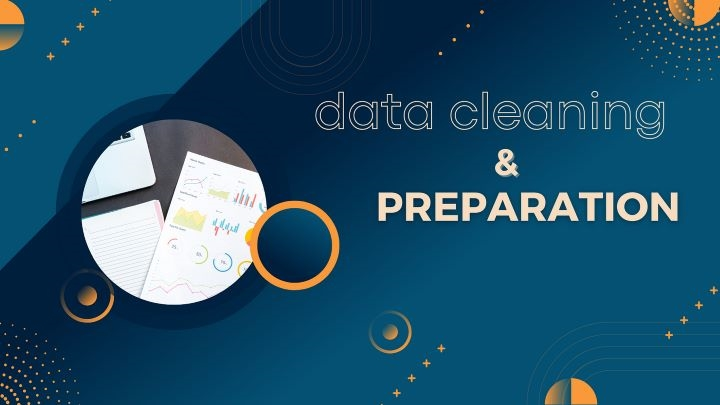





#1.1. Imports:
This code imports essential libraries for building and visualizing machine learning models using TensorFlow and Keras.


**TensorFlow**: Imports the TensorFlow library for machine learning.

**Keras**: Imports the high-level Keras API from TensorFlow.

**NumPy:** Imports the NumPy library for numerical computations.

**Matplotlib:** Imports the Matplotlib library for data visualization.



In [40]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#1.2. Load the Data
```
keras.datasets.mnist.load_data()
```
 loads the MNIST dataset from Keras.

The dataset is split into two parts:
* Training set: (X_train, Y_train)

   > X_train contains the training images.

    >Y_train contains the corresponding labels for the training images.

* Testing set: (X_test, Y_test)
>X_test contains the testing images.

 >Y_test contains the corresponding labels for the testing images.

The MNIST dataset consists of 70,000 grayscale images of handwritten digits (0-9), with 60,000 images in the training set and 10,000 images in the testing set.

Each image is 28x28 pixels.

By loading the dataset using keras.datasets.mnist.load_data(), you can easily access the training and testing data for building and evaluating your machine learning models.

In [41]:
(X_train, Y_train), (X_test,Y_test)=  keras.datasets.mnist.load_data()

In [42]:
#getting the length of the dataset i.e. total number of samples (that is 60k)

print(f"The length of X_train is {len(X_train)}")
print(f"The length of X_test is {len(X_test)}")

The length of X_train is 60000
The length of X_test is 10000


In [43]:
#getting the shzpe of features
print(f"The shape of each element in X_train is {X_train[0].shape}")

The shape of each element in X_train is (28, 28)


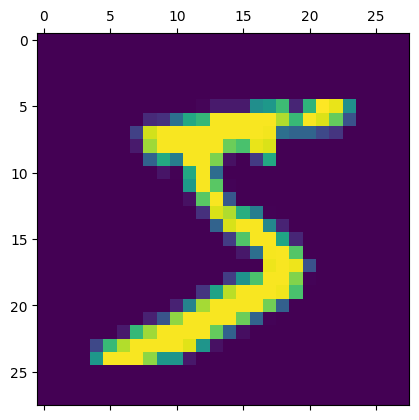

In [44]:
#displaying the data
plt.matshow(X_train[0])


# 1.3. Flattening the Features

In this step, we reshape the training and testing datasets to convert each *28x28*  image into a flat vector of *784 pixels*.

* This is done using the .reshape() method, which reorganizes the data structure

* The resulting X_train_flat and X_test_flat arrays will have shapes of (number_of_images, 784), making them suitable for machine learning algorithms that require 1D input.




In [45]:
#flattening data as follows:
X_train_flat =X_train.reshape(len(X_train),28*28)
X_test_flat= X_test.reshape(len(X_test),28*28)

In [46]:
#showing the difference btw X_train and X_train_flat
print(f"The elements of X_train are\n {X_train}\n{'-'*50}")
print(f"The elements of X_train_flat are\n{X_train_flat}\n{'-'*50}")

The elements of X_train are
 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
--------------------------------------------------
The elements of X_train_flat are
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0

In [47]:
#Getting the shape of resulting features after flattening them

print(f"The shape of each element in X_train_flat is {X_train_flat[0].shape}")
print(f"The shape of each element in X_test_flat is {X_test_flat[0].shape}")

The shape of each element in X_train_flat is (784,)
The shape of each element in X_test_flat is (784,)


#1.4. Normalizing the Features

In this code snippet, we utilize the MinMaxScaler from the sklearn.preprocessing module to normalize our data.

* **Importing MinMaxScaler**: We first import the MinMaxScaler class, which is designed to scale features to a specified range, typically [0, 1].

* **Creating a Scaler Instance:** We create an instance of MinMaxScaler called scaler.

* **Fitting and Transforming Training Data**: The fit_transform method is applied to X_train_flat, which calculates the minimum and maximum values of the training data and scales it accordingly.

* **Transforming Test Data**: The transform method is then applied to X_test_flat, which scales the test data using the same parameters (min and max) derived from the training data, ensuring consistency in scaling.


This process is essential for preparing the data for machine learning algorithms, as it helps improve convergence and performance.

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_flat=scaler.fit_transform(X_train_flat)
X_test_flat=scaler.transform(X_test_flat)

#1.4. Encoding the Target Labels

* In this step, we utilize the OneHotEncoder from the sklearn.preprocessing module to convert categorical labels into a one-hot encoded format.

* The reshape(-1, 1) method is used to convert the labels into the required 2D format.

* The .toarray() method in the context of OneHotEncoder is used to convert the output from a sparse matrix format to a dense NumPy array.
By default, OneHotEncoder returns a sparse matrix, which is more memory-efficient for large datasets but can be less intuitive to work with. Using .toarray() makes the data easier to manipulate and visualize by converting it into a standard array format that contains all the encoded values explicitly.

* This is essential for machine learning models that require numerical input.

* This process prepares the categorical data for machine learning algorithms by converting it into a binary format that can be easily interpreted.


In [49]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
Y_train_encoded=encoder.fit_transform(Y_train.reshape(-1,1)).toarray()
Y_test_encoded=encoder.transform(Y_test.reshape(-1,1)).toarray()
print(Y_train_encoded)
print("_"*50)
print(Y_test_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
__________________________________________________
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# 2. ***Model Building***

In this process , we perform following steps:
* Layering the Model
* Compile the model
* Model Fitting
* Prediction
---
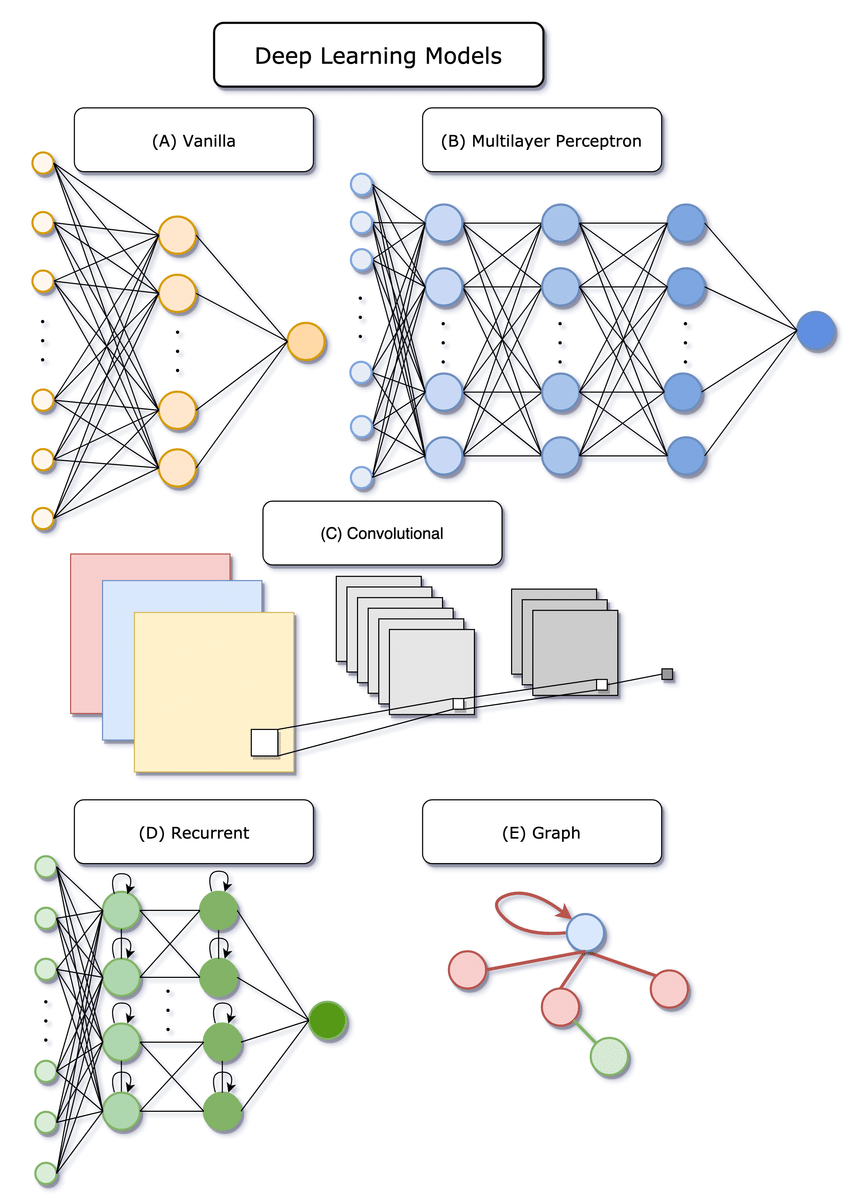

#2.1. ***Layering the Model***
In this step, we construct a neural network model using Keras' Sequential API. The model consists of three layers:

* **Hidden Layer 1**: A dense layer with 300 neurons and ReLU (Rectified Linear Unit) activation function, which helps the model learn complex patterns.

* **Hidden Layer 2**: Another dense layer with 100 neurons and ReLU activation, further refining the feature extraction from the previous layer.

* **Output Layer**: A dense layer with 10 neurons and softmax activation, which is suitable for multi-class classification tasks, providing probabilities for each class.

This architecture allows the model to effectively learn and classify input data.


In [50]:
#Lets build the model
model=keras.Sequential([

    keras.layers.Dense(300, activation='relu'),    #hidden layer
    keras.layers.Dense(100, activation='relu'),    #hidden layer

    keras.layers.Dense(10, activation='softmax')   #outer layer

])

# 2.2. **Compile the Model**

In this step, the model is configured for training by specifying the following parameters:

* **Optimizer**: 'adam' is chosen for its efficiency in handling large datasets and its ability to adaptively adjust the learning rate.

* **Loss Function**: 'categorical_crossentropy' is used as the loss function, which is suitable for multi-class classification problems.

* **Metrics:** ['accuracy'] indicates that the model's performance will be evaluated based on the accuracy of predictions during training and testing.


This setup prepares the model to learn from the data effectively.

In [51]:
#compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']

)

In [52]:
print(X_train.shape)
print(X_train_flat.shape)
print(Y_train_encoded.shape)
print(Y_train.shape)



(60000, 28, 28)
(60000, 784)
(60000, 10)
(60000,)


#2.3. Model Fitting

In this step, the model is trained on the training dataset. The fit method is called with the following parameters:
* **X_train_flat:** The input features, flattened for processing.
* **Y_train_encoded:** The corresponding encoded labels for the training data.
* **epochs=10:** The number of complete passes through the training dataset during the fitting process.

The result, stored in track, contains information about the training process, such as loss and accuracy metrics for each epoch.

In [53]:
# Model fitting
track=model.fit(X_train_flat,Y_train_encoded, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8991 - loss: 0.3485
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9729 - loss: 0.0856
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9819 - loss: 0.0568
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9871 - loss: 0.0415
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9899 - loss: 0.0304
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9920 - loss: 0.0265
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9941 - loss: 0.0177
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9951 - loss: 0.0142
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9951 - loss: 0.0163
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9956 - loss: 0.0136


#2.4. Predictions
* **Predict Probabilities:**
```
Y_prob=model.predict(X_test_flat)
```
This line uses the trained model to predict the probabilities of each class for the test data (X_test_flat).

* **Get Class Predictions:**
```
Y_pred=Y_prob.argmax(axis=1)
```
This line extracts the class with the highest probability for each sample, resulting in the final predicted class labels (Y_pred).

In [54]:
Y_prob=model.predict(X_test_flat)
Y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[1.0631105e-15, 2.9348854e-10, 2.0121099e-12, ..., 9.9999994e-01,
        3.8022686e-15, 3.5962240e-11],
       [6.4374064e-14, 4.6545558e-13, 9.9999994e-01, ..., 7.9195351e-14,
        1.6896823e-10, 8.4808521e-20],
       [7.3576144e-13, 9.9999958e-01, 3.4645758e-10, ..., 3.8297918e-07,
        5.0144728e-09, 2.3321228e-10],
       ...,
       [1.3371844e-21, 9.1780156e-17, 4.2946416e-20, ..., 3.1267913e-14,
        3.4596664e-16, 1.2538577e-11],
       [2.0543334e-15, 2.2051133e-15, 2.6604473e-19, ..., 1.3555246e-13,
        6.2538078e-08, 2.6604693e-18],
       [1.8795382e-17, 1.9049491e-14, 1.8556489e-19, ..., 7.4263396e-27,
        1.6017783e-16, 7.0332984e-17]], dtype=float32)

In [55]:
Y_pred=Y_prob.argmax(axis=1)
#showing Y_test and Y_pred
print(f"Y_pred is\n{Y_pred}\n{'-'*50}")
print(f"Y_test is\n{Y_test}\n{'-'*50}")

Y_pred is
[7 2 1 ... 4 5 6]
--------------------------------------------------
Y_test is
[7 2 1 ... 4 5 6]
--------------------------------------------------


The predicted value for X_test[13] is 
0
--------------------------------------------------
The actual value for X_test[13] is
0
--------------------------------------------------
The actual image for X_test[13] is shown below
--------------------------------------------------AxesImage(size=(28, 28))


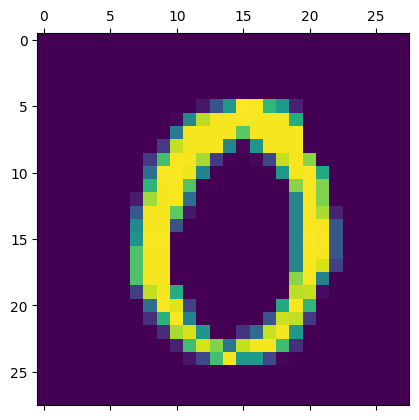

In [56]:
#fOR 13TH ELEMENT
print(f"The predicted value for X_test[13] is \n{Y_pred[13]}\n{'-'*50}")
print(f"The actual value for X_test[13] is\n{Y_test[13]}\n{'-'*50}")
print(f"The actual image for X_test[13] is shown below\n{'-'*50}{plt.matshow(X_test[13])}")


The predicted value for X_test[11] is 
6
--------------------------------------------------
The actual value for X_test[11] is
6
--------------------------------------------------
The actual image for X_test[11] is shown below
--------------------------------------------------


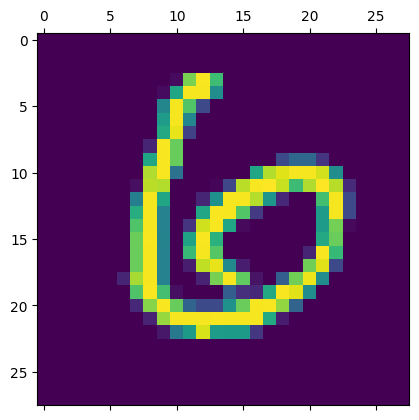

In [57]:
#FOR 11TH ELEMENT
print(f"The predicted value for X_test[11] is \n{Y_pred[11]}\n{'-'*50}")
print(f"The actual value for X_test[11] is\n{Y_test[11]}\n{'-'*50}")
print(f"The actual image for X_test[11] is shown below\n{'-'*50}")
plt.matshow(X_test[11])


The predicted value for X_test[2004] is 
8
--------------------------------------------------
The actual value for X_test[2004] is
8
--------------------------------------------------
The actual image for X_test[2004] is shown below
--------------------------------------------------


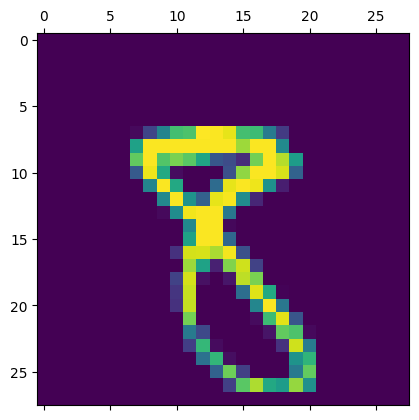

In [58]:
#FOR 2004TH ELEMENT
print(f"The predicted value for X_test[2004] is \n{Y_pred[2004]}\n{'-'*50}")
print(f"The actual value for X_test[2004] is\n{Y_test[2004]}\n{'-'*50}")
print(f"The actual image for X_test[2004] is shown below\n{'-'*50}")
plt.matshow(X_test[2004])

# 3. Model Evaluation
in this step , we'll evaluate the model using following metrices:

* Accuracy
* Loss
* Confusion Matrix
* Classification report

We'll also navigate through the mismatched or unwanted results
---
evaluate.jpg

#3.1. **Accuaracy & Loss**

We used .evaluate() function to assess the performance of a trained machine learning model on a test dataset.

* The final evaluation results are displayed as a list: [0.09417571872472763, 0.9790999889373779], where the first element is the loss value (0.0941) and the second element is the accuracy (0.979 or 97.9%).

In [59]:
model.evaluate(X_test_flat,Y_test_encoded)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9748 - loss: 0.1314


[0.104682058095932, 0.9785000085830688]

#3.2. Confusion Matrix Evaluation
The code snippet uses the confusion_matrix function from the sklearn.metrics module to evaluate the performance of the model.

**Output Interpretation**

The output is a 2D array representing the confusion matrix, where:

* Each row corresponds to the actual class(i.e. digits from 0 to 9).
* Each column corresponds to the predicted class.
* The diagonal elements indicate correct predictions, while off-diagonal elements represent misclassifications.

This matrix provides insights into the model's accuracy and helps identify specific areas for improvement.

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[ 966,    0,    2,    1,    2,    0,    2,    2,    3,    2],
       [   0, 1130,    0,    1,    0,    0,    1,    1,    2,    0],
       [   1,    0, 1012,    1,    1,    0,    2,    8,    7,    0],
       [   0,    0,    3,  984,    0,    3,    0,    4,    7,    9],
       [   2,    0,    1,    0,  966,    0,    5,    3,    1,    4],
       [   2,    1,    0,    4,    2,  861,    5,    0,   12,    5],
       [   2,    2,    0,    0,   10,    4,  937,    0,    2,    1],
       [   1,    1,   10,    1,    2,    0,    0, 1005,    2,    6],
       [   1,    0,    1,    1,    8,    0,    1,    4,  954,    4],
       [   1,    4,    0,    1,   25,    1,    0,    5,    2,  970]])

#3.3. Classification Report
The code snippet uses the classification_report function from the sklearn.metrics module to evaluate the performance of a classification model.

**Key Components of the Output:**

**Precision:** The model has high precision (0.95-0.99) and recall (0.96-0.99) for all classes, indicating low false positives and false negatives.

**Recall:** The ratio of true positive predictions to the total actual positives. It measures the model's ability to identify all relevant instances.

**F1-Score:** The F1-score (harmonic mean of precision and recall) ranges from 0.97 to 0.99, suggesting a good balance between precision and recall.

**Support:** The support column shows the number of instances for each class in the test set (e.g., 980 instances for class 0, 1135 for class 1, etc.).

>The overall accuracy is 0.98, meaning the model correctly classifies 98% of the instances in the test set.

>The macro avg and weighted avg rows provide the average metrics across all classes.

In [61]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.95      0.98      0.97       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#3.4. Scatter Plot to show deviation b/w Predictions & Actual Results
**Purpose of the Scatter Plot:**

This scatter plot visualizes the relationship between the actual values (
𝑌
𝑡
𝑒
𝑠
𝑡
 ) and the predicted values (
𝑌
𝑝
𝑟
𝑒
𝑑
 ). It helps in assessing how well the model’s predictions align with the true values.

**Interpreting the Scatter Plot:**

* **Alignment with the Red Dashed Line**:

The red dashed line represents perfect predictions. Points lying on this line indicate perfect predictions where
𝑌
𝑡
𝑒
𝑠
𝑡
=
𝑌
𝑝
𝑟
𝑒
𝑑
 . The closer the points are to this line, the better the model's predictions.

* **Dispersion of Points:**

The dispersion or spread of the points around the red dashed line indicates the accuracy of the predictions. A tight clustering of points around the line suggests high accuracy, while wider dispersion indicates greater prediction errors.


* **Symmetry**: If the scatter plot is symmetric around the red dashed line, it suggests that the model does not have a systematic bias (i.e., it doesn’t consistently overestimate or underestimate the values).


* **Outliers:** Points that are far from the red dashed line are outliers, indicating instances where the model's predictions significantly deviated from the actual values.


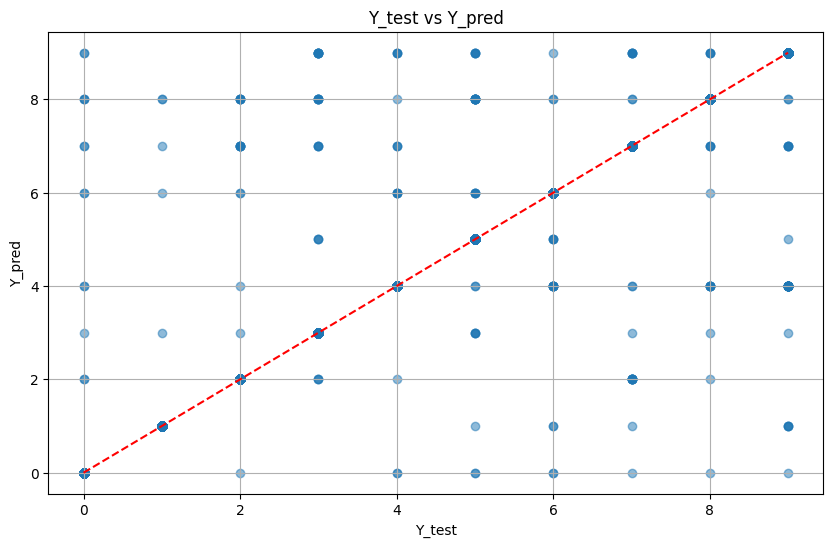

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # Line for perfect predictions
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.title('Y_test vs Y_pred')
plt.grid()
plt.show()

#3.5. Histogram to show deviation b/w Predictions & Actual Results
**Purpose of the Histogram:**

The histogram aims to visualize the residuals, which are the differences between the actual and predicted values. These differences are calculated as

differences
=
𝑌
𝑡
𝑒
𝑠
𝑡
−
𝑌
𝑝
𝑟
𝑒
𝑑
 .


**Interpreting the Histogram:**

* **Centering Around Zero:** The histogram shows a significant peak around zero. This indicates that most predictions are very close to the actual values, suggesting that the model performs well for most instances.

* **Symmetry**: If the histogram is symmetric around zero, it indicates that the model does not consistently over-predict or under-predict.

* **Spread**: The spread of the histogram gives an indication of the model's prediction accuracy. A narrow spread means the predictions are consistently close to the actual values, while a wide spread indicates more variability in the prediction errors.

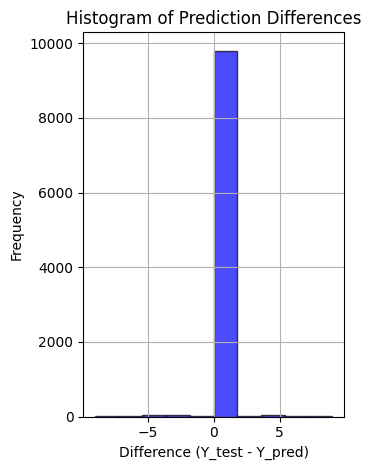

In [63]:
# Histogram of the differences
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
differences = Y_test - Y_pred
plt.hist(differences, bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Difference (Y_test - Y_pred)')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Differences')
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()

#3.6. **Graph b/w Model Accuracy & Loss**
Following graph shows that the model accuracy increases and loss decreases with progressing epochs from 1 to 10


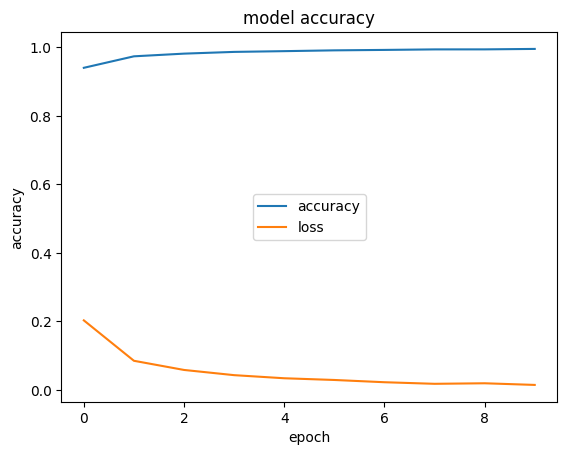

In [64]:
plt.plot(track.history['accuracy'])
plt.plot(track.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='center')
plt.show()

#3.7. Navigating through MisMatched Results

This code snippet identifies and analyzes mismatches between predicted and actual values in a test dataset.

**Key Steps:**
* **Initialization:**
\
An empty list mismatched is created to store indices of incorrect predictions.

* **Mismatch Detection:**
\
A loop iterates through Y_test (actual values) and Y_pred (predicted values).

* If a prediction does not match the actual value, the index is appended to the mismatched list.

* **Results Output:**
\
The indices of incorrect predictions are printed.
\
The total number of test values and the count of mismatches are displayed.
\
Finally, the percentage of incorrect predictions relative to the total test data is calculated and printed.

In [65]:
mismatched=[]
for i,m in enumerate(Y_test):
  if Y_test[i]!=Y_pred[i]:
    mismatched.append(i)

print(f"The indeces that show wrong results are\n{mismatched}\n{'-'*50}")

print(f"Out of {len(X_test)} values in total for test data, {len(mismatched)} are wrong results\n{'-'*50}")
print(f"The percentage deviation of the model observed is {(len(mismatched)/len(X_test))*100}%")

The indeces that show wrong results are
[92, 104, 151, 247, 321, 326, 381, 445, 447, 582, 619, 646, 659, 684, 691, 720, 874, 882, 947, 951, 1014, 1032, 1039, 1044, 1114, 1156, 1166, 1178, 1191, 1192, 1226, 1232, 1242, 1247, 1319, 1328, 1378, 1393, 1425, 1444, 1522, 1530, 1549, 1554, 1569, 1600, 1681, 1721, 1743, 1782, 1790, 1901, 1911, 1913, 1941, 1987, 2016, 2024, 2033, 2053, 2070, 2109, 2118, 2125, 2135, 2162, 2182, 2185, 2224, 2293, 2333, 2369, 2387, 2406, 2408, 2414, 2422, 2426, 2488, 2597, 2607, 2654, 2720, 2845, 2863, 2877, 2921, 2927, 2939, 2953, 2979, 3030, 3060, 3117, 3289, 3422, 3460, 3474, 3503, 3520, 3558, 3565, 3681, 3702, 3727, 3762, 3776, 3780, 3808, 3818, 3869, 3893, 3906, 3941, 3985, 4065, 4176, 4193, 4199, 4205, 4224, 4248, 4289, 4306, 4315, 4360, 4369, 4405, 4439, 4477, 4487, 4497, 4551, 4571, 4690, 4723, 4731, 4740, 4751, 4807, 4814, 4823, 4879, 4880, 4956, 4963, 4966, 5176, 5183, 5331, 5457, 5634, 5676, 5734, 5757, 5887, 5937, 5955, 5972, 5973, 5985, 5997, 6011, 60

In [67]:
# Displaying the mismatched values
import pandas
new_row=[]

for i in range(len(Y_test)):
  new_row.append({'Y_test':Y_test[i],'Y_pred':Y_pred[i]})

df=pandas.DataFrame(data=new_row,columns=['Y_test','Y_pred'])
df.loc[mismatched]

,Y_test,Y_pred
92,9,4
104,9,5
151,9,8
247,4,6
321,2,7
...,...,...
9792,4,7
9839,2,7
9883,5,1
9904,2,8



# ***Report: Handwritten Number Classification***
---

\

## **Introduction**

\

The dataset utilized in this project is the MNIST dataset, which comprises 70,000 grayscale images of handwritten digits (0-9). This dataset is divided into a training set containing 60,000 images and a testing set with 10,000 images. Each image is represented as a 28x28 pixel matrix. The primary objective of this analysis is to develop a classification model capable of accurately predicting the digit represented in each image.

\

## **Data Analysis and Visualization**

\

#### ***Exploratory Data Analysis (EDA) provided several key insights:***

- **Dataset Structure**: The training set consists of 60,000 samples, while the testing set contains 10,000 samples. Each image is initially represented as a 2D array of shape (28, 28), which is then flattened into a 1D vector of 784 pixels.
- **Feature Normalization**: The pixel values were normalized using Min-Max Scaling to a range of [0, 1]. This normalization is crucial for improving the convergence and performance of the machine learning algorithms.
- **Target Encoding**: The target labels were converted into a one-hot encoded format using OneHotEncoder, transforming categorical labels (digits 0-9) into a binary format suitable for multi-class classification. The training labels were reshaped to a 2D format, resulting in a shape of (60,000, 10).
- **Visualization**: A sample image from the dataset was displayed using Matplotlib, confirming the clarity and structure of the data.

\

## **Model Building**
\
### **Model Architecture**

The model was constructed using the Keras Sequential API, consisting of the following layers:
- **Hidden Layer 1**: A dense layer with 300 neurons and ReLU (Rectified Linear Unit) activation, designed to learn complex patterns from the input data.
- **Hidden Layer 2**: Another dense layer with 100 neurons and ReLU activation, further refining the feature extraction process.
- **Output Layer**: A dense layer with 10 neurons and softmax activation, providing probabilities for each of the 10 classes.

The model was compiled with the following parameters:
- **Optimizer**: Adam optimizer was chosen for its efficiency in handling large datasets and adaptively adjusting the learning rate.
- **Loss Function**: Categorical crossentropy was used as the loss function, suitable for multi-class classification problems.
- **Metrics**: Accuracy was specified as the evaluation metric to assess the model's performance during training.

The model was trained for 10 epochs on the training dataset, with the training process monitored through loss and accuracy metrics.

\

## **Model Evaluation**

\

The model's performance was evaluated based on accuracy and loss metrics over the training epochs:
- **Epoch 1**: Accuracy = 89.91%, Loss = 0.3485
- **Epoch 2**: Accuracy = 97.29%, Loss = 0.0856
- **Epoch 3**: Accuracy = 98.19%, Loss = 0.0568
- **Epoch 4**: Accuracy = 98.71%, Loss = 0.0415
- **Epoch 5**: Accuracy = 98.99%, Loss = 0.0304
- **Epoch 6**: Accuracy = 99.20%, Loss = 0.0265
- **Epoch 7**: Accuracy = 99.41%, Loss = 0.0177
- **Epoch 8**: Accuracy = 99.51%, Loss = 0.0142
- **Epoch 9**: Accuracy = 99.51%, Loss = 0.0163
- **Epoch 10**: Accuracy = 99.56%, Loss = 0.0136

The final model achieved a training accuracy of **99.56%**, indicating a strong performance in classifying handwritten digits. The training loss decreased consistently across epochs, demonstrating effective learning.


\

## **Applications**

\

### **Handwritten Digit Recognition**

One of the most direct applications of this model is in the field of handwritten digit recognition. This technology can be integrated into systems such as postal mail sorting, bank check processing, and digitizing handwritten documents. The model’s high accuracy and efficiency make it well-suited for real-time processing and automation tasks.

### **Optical Character Recognition (OCR)**

Beyond digits, similar models can be adapted for broader optical character recognition applications, assisting in converting various handwritten or printed texts into digital formats. This is particularly useful in archival and digitization efforts for libraries and administrative bodies.

### **Educational Tools**

The model can be implemented in educational software to assist with the automatic grading of handwritten student submissions, offering quick and accurate assessments. It can also be used in tutoring systems to provide immediate feedback to students practicing handwriting.

### **Mobile Applications**

In mobile apps, such a model can enhance note-taking applications by converting handwritten notes into editable text. This facilitates a more seamless user experience by bridging the gap between traditional writing and digital text manipulation.

By leveraging its robust classification capabilities, this neural network model demonstrates significant potential across various domains, enhancing automation, accuracy, and efficiency in processing handwritten data.


\

## **Conclusion**

\

The classification model effectively learned to predict handwritten digits, achieving a final training accuracy of 99.56%. The architecture, including two hidden layers with ReLU activations and a softmax output layer, contributed significantly to the model's performance.

- ***Future work*** could involve testing the model on additional datasets to evaluate its generalizability, experimenting with different architectures, or employing techniques such as data augmentation to further enhance model robustness. Additionally, implementing cross-validation could ensure the model's reliability and performance on unseen data.